Explore the Dataset:

In [1]:
import pandas as pd

# Read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Get information about the dataset
print(df.info())

   customerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
0          No 

Data Cleaning:



In [2]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
# Fill missing values
df.fillna(method='ffill', inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_26620\1940206128.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Identify outliers using IQR
# Convert 'TotalCharges' column to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges' after conversion
df.dropna(subset=['TotalCharges'], inplace=True)

Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)

Data Preprocessing:

In [6]:
#Encoding Categorical Variables:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

Exploratory Data Analysis (EDA)

In [8]:
# Summary statistics
print(df.describe())

       SeniorCitizen       Tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000    7.032000e+03  7.032000e+03
mean        0.162400    32.421786    6.062651e-17 -1.119064e-16
std         0.368844    24.545260    1.000071e+00  1.000071e+00
min         0.000000     1.000000   -1.547283e+00 -9.990692e-01
25%         0.000000     9.000000   -9.709769e-01 -8.302488e-01
50%         0.000000    29.000000    1.845440e-01 -3.908151e-01
75%         0.000000    55.000000    8.331482e-01  6.668271e-01
max         1.000000    72.000000    1.793381e+00  2.824261e+00


Data Visualizations:



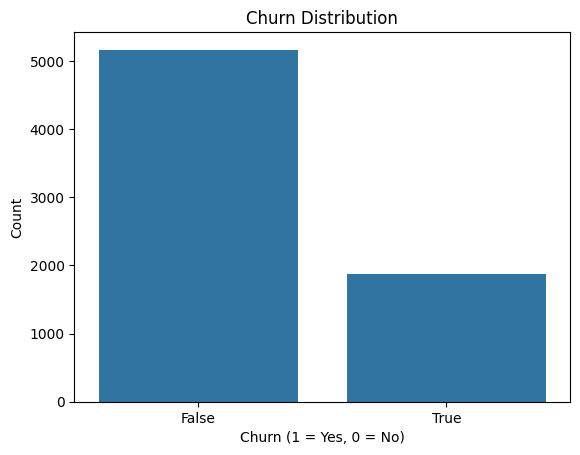

In [9]:
#Churn Distribution:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
sns.countplot(x='Churn_Yes', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

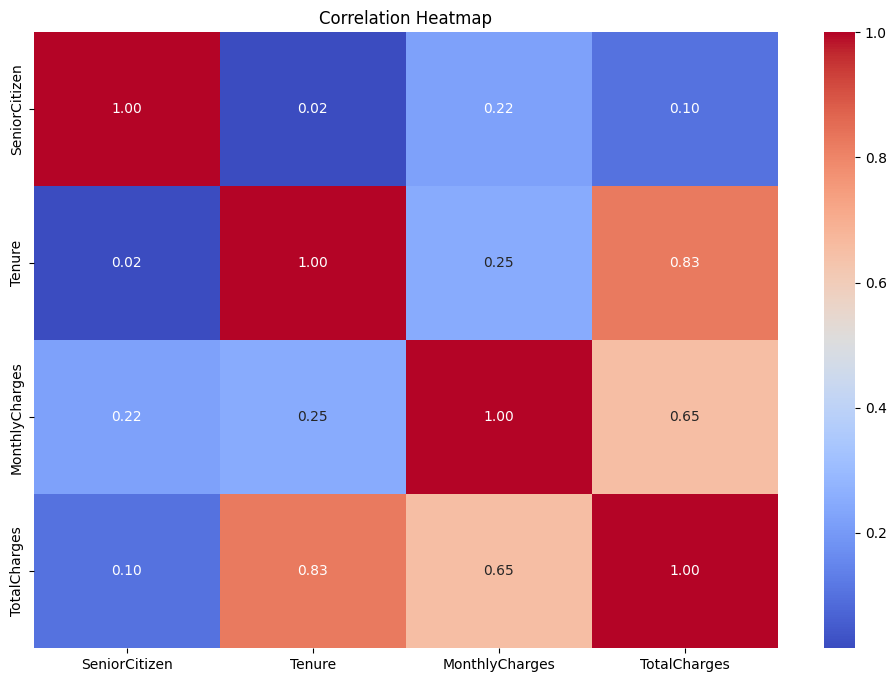

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric features
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Model Selection and Building**

In [11]:
#Split the Data:
# Check the columns in the DataFrame
print(df.columns)


Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Manual', 'Churn_Yes'],
      dtype='object', length=7054)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# Select relevant features and target variable
selected_features = ['Tenure', 'MonthlyCharges', 'Contract']
df = df[selected_features + ['Churn']]

# Convert categorical column 'Contract' to numerical using Label Encoding
df['Contract'] = LabelEncoder().fit_transform(df['Contract'])  # Encode 'Month-to-month', 'One year', 'Two year'

# Convert target variable 'Churn' to numerical
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Split data into train and test sets
X = df[['Tenure', 'MonthlyCharges', 'Contract']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'best_rf_model.pkl')

# Save feature names
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model trained and saved as 'best_rf_model.pkl'")

# Read dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# Data preprocessing steps (as previously discussed)
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df.drop('Churn_Yes', axis=1)  # Assuming 'Churn_Yes' is the target variable
y = df['Churn_Yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC()
}

# Train and validate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print classification report
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))  

# Compare model performances
print("Model Performance Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Model trained and saved as 'best_rf_model.pkl'


C:\Users\mathe\AppData\Local\Temp\ipykernel_26620\4210945023.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\mathe\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.82      0.92      0.86      1033
        True       0.65      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407

Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

       False       0.73      1.00      0.85      1033
        True       0.00      0.00      0.00       374

    accuracy                          

c:\Users\mathe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mathe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mathe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import threading
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import os 

# Initialize Flask app
app = Flask(__name__)

# Load the trained model and feature names
MODEL_PATH = 'best_rf_model.pkl'
FEATURES_PATH = 'model_features.pkl'

if os.path.exists(MODEL_PATH) and os.path.exists(FEATURES_PATH):
    model = joblib.load(MODEL_PATH)
    model_features = joblib.load(FEATURES_PATH)
else:
    model = None
    model_features = None

@app.route('/')
def home():
    return jsonify({
        'message': 'Welcome to the prediction API!',
        'endpoints': {
            '/predict': 'POST endpoint for predictions'
        }
    })

@app.route('/predict', methods=['POST'])
def predict():
    if model is None or model_features is None:
        return jsonify({'error': "Model or features file not found."}), 500

    try:
        data = request.get_json(force=True)
        if not data:
            return jsonify({'error': 'No input data provided'}), 400

        # Convert input data to DataFrame
        input_data = pd.DataFrame([data])

        # Validate features
        missing_features = set(model_features) - set(input_data.columns)
        if missing_features:
            return jsonify({'error': f'Missing features: {missing_features}'}), 400

        # Ensure features are in the correct order
        input_data = input_data[model_features]

        # Make predictions
        prediction = model.predict(input_data)
        prediction_proba = model.predict_proba(input_data)[:, 1][0]

        # Create a user-friendly message
        churn_message = (
            "The customer is likely to churn."
            if prediction[0] == 1
            else "The customer is unlikely to churn."
        )
        churn_probability = round(prediction_proba * 100, 2)

        return jsonify({
            'message': churn_message,
            'churn_probability': f"{churn_probability}%"
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Run Flask app in a separate thread
def run_app():
    app.run(port=5000, debug=True, use_reloader=False)

# Start the server in a thread
thread = threading.Thread(target=run_app)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Dec/2024 17:35:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2024 17:36:03] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2024 17:36:10] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2024 17:39:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2024 17:39:40] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [11/Dec/2024 17:39:40] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [11/Dec/2024 18:09:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2024 18:09:49] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [11/Dec/2024 18:30:06] "GET / HTTP/1.1" 200 -
